<a href="https://colab.research.google.com/github/2065635josue-byte/2025_Repositorio_IntArtyRedNeu/blob/main/Actividades/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF7: Redes Neuronales Artificiales  

Autores:
*   Josué Isaac López Salazar 2065635 IMTC N4-N6
*   Humberto Alejandro Carreón Corpus 2042901 IMTC N4-N6
*   Francisco Gutiérrez Zúñiga 1910331 IMTC N4-N6
*   Johann Jonás Andrade Esteban 2109318 IMTC N4-N6

# PASO 1: Cargar Librerías

Carga de Librerías (Tensorflow, tf.keras, numpy y matplotlib)

In [271]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# Paso 2: Cargar datos



In [272]:
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Obtención de datos de entrenamiento y de prueba

In [273]:
(x_train, y_train), (x_test, y_test) = mnist_data

Dimensión o forma del conjunto de datos de las imagenes de entrenamiento (x_train).

In [274]:
x_train.shape

(60000, 28, 28)

Dimension o forma de las etiquetas de entrenamiento (y_train).

In [275]:
y_train.shape

(60000,)

Dimensión o forma del conjunto de datos de las imagenes de prueba (x_test).

In [276]:
x_test.shape

(10000, 28, 28)

Dimension o forma de las etiquetas de prueba (y_test).

In [277]:
y_test.shape

(10000,)

Determinación de la cantidad de imágenes en nuestro conjunto de datos de entrenamiento.

In [278]:
len(x_train)

60000

Determinación de la cantidad de etiquetas en nuestro conjunto de datos de entrenamiento.

In [279]:
len(y_train)

60000

Determinación de la cantidad de imágenes en nuestro conjunto de datos de prueba.

In [280]:
len(x_test)

10000

Determinación de la cantidad de etiquetas en nuestro conjunto de datos de prueba.

In [281]:
len(y_test)

10000

# Paso 3: Preprocesamiento de Datos

Inspección de la primera imagen en el conjunto de entrenamiento. Se observa que el rango de los valores es de 0 a 255.

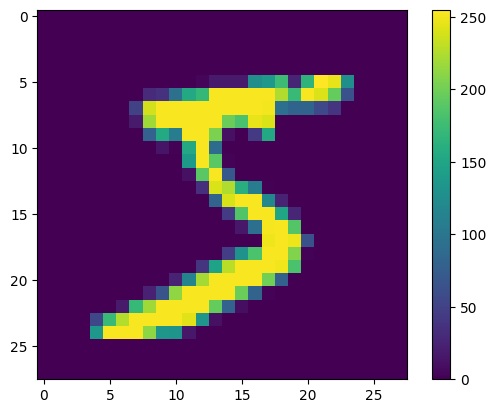

In [282]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Inspección de la primera imagen en el conjunto de entrenamiento en escala de grises.

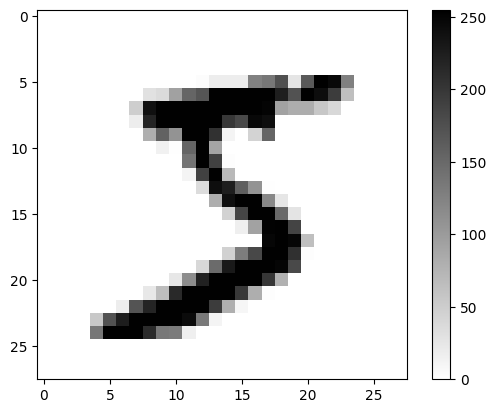

In [283]:
plt.figure()
plt.imshow(x_train[0], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

Escalación de los datos.
Como el rango es de 0 a 255, se divide entre 255 para escalar los datos a rangos de 0 a 1.

In [284]:
x_train = x_train / 255.0

x_test = x_test / 255.0

Imagen de las primeras 25 imágenes del conjunto de entrenamiento (x_train) con el nombre de la clase o etiqueta debajo de cada imagen (y_train).

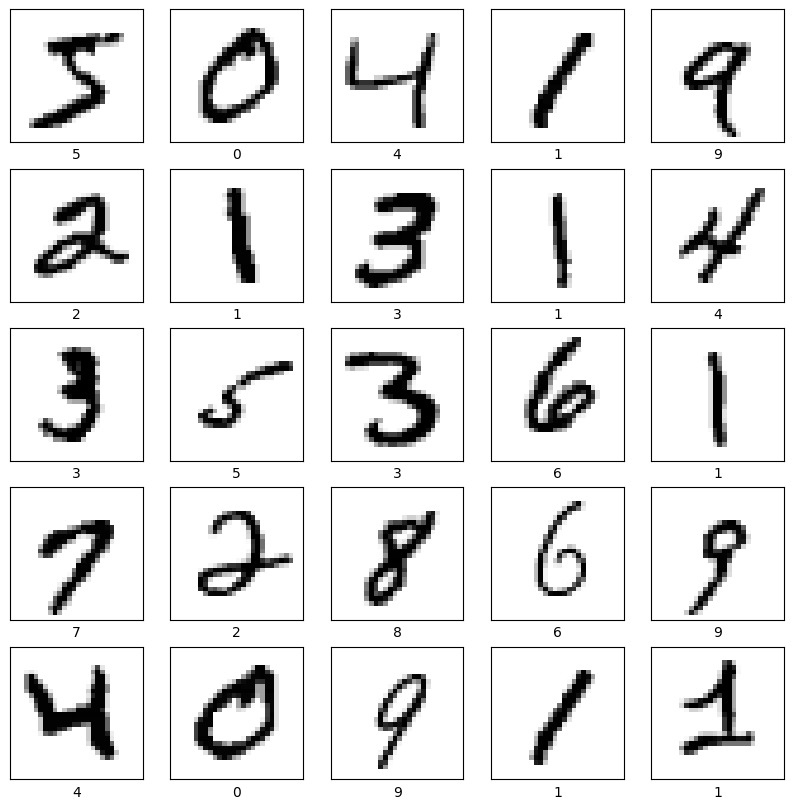

In [285]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Paso 4: Selección del modelo y entrenamiento

Se selecciona el modelo y se generan las capas.
Capa 1 es capa de entrada.
Capa 2 es la de entrenamiento con activación softmax.
Capa 3 es capa de salida.

In [286]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilación del modelo y selección del optimizador "adam". La métrica a utilizar será "accuracy" (exactitud).

In [287]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Carga del modelo e inicio del entrenamiento por medio de "fit".

In [288]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5894 - loss: 1.7149
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6068 - loss: 0.9269
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6315 - loss: 0.8205
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7331 - loss: 0.7077
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8286 - loss: 0.5061
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8402 - loss: 0.4519
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8520 - loss: 0.4188
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8621 - loss: 0.4021
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8797 - loss: 0.3812
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8983 - loss: 0.3548


Evaluación de la precisión del modelo.

In [289]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8993 - loss: 0.3650

Test accuracy: 0.8992999792098999


# Paso 5: Prueba del modelo

Generación de predicciones.

In [290]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Se realiza una prediccion de cada imagen del conjunto de prueba.

In [291]:
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Se observa la predicción de la primera imagen.

In [292]:
predictions[0]

array([8.6256208e-05, 2.6591952e-04, 8.1895501e-04, 4.5946203e-03,
       1.7618446e-06, 1.5110885e-04, 5.4482080e-06, 9.4130898e-01,
       1.2876428e-04, 5.2638214e-02], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la primera imagen:

In [293]:
np.argmax(predictions[0])

np.int64(7)

Se observa la predicción de la segunda imagen.

In [294]:
predictions[1]

array([4.2145295e-04, 9.9064922e-04, 9.8388261e-01, 4.7463793e-03,
       8.1764121e-04, 9.4134337e-04, 3.3978960e-03, 2.1317448e-03,
       2.6489794e-03, 2.1221735e-05], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la segunda imagen:

In [295]:
np.argmax(predictions[1])

np.int64(2)

Se observa la predicción de la tercera imagen.

In [296]:
predictions[2]

array([1.2214687e-04, 9.8631674e-01, 6.7560823e-04, 1.7006355e-04,
       1.0457091e-03, 6.8003946e-04, 6.8090518e-04, 1.7130414e-03,
       8.0081364e-03, 5.8757560e-04], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la tercera imagen:

In [297]:
np.argmax(predictions[2])

np.int64(1)

Se observa la predicción de la cuarta imagen.

In [298]:
predictions[3]

array([9.8654789e-01, 2.5240358e-04, 2.4119697e-03, 1.0218563e-03,
       9.0157863e-04, 2.4140822e-03, 1.9560230e-03, 8.1863109e-04,
       1.8348773e-03, 1.8406416e-03], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la cuarta imagen:

In [299]:
np.argmax(predictions[3])

np.int64(0)

Se observa la predicción de la quinta imagen.

In [300]:
predictions[4]

array([1.2439102e-03, 7.2822347e-04, 2.5874702e-03, 8.3058134e-05,
       8.8626486e-01, 5.0345343e-03, 1.6254899e-03, 8.3885103e-04,
       5.4518204e-02, 4.7075458e-02], dtype=float32)

Se observa qué etiqueta tiene el valor de confianza más alto en la quinta imagen:

In [301]:
np.argmax(predictions[4])

np.int64(4)

Se observa la etiqueta de la primera imagen:

In [302]:
print(y_test[0])

7


Se observa la etiqueta de la segunda imagen:

In [303]:
print(y_test[1])

2


Se observa la etiqueta de la tercera imagen:

In [304]:
print(y_test[2])

1


Se observa la etiqueta de la cuarta imagen:

In [305]:
print(y_test[3])

0


Se observa la etiqueta de la quinta imagen:

In [306]:
print(y_test[4])

4


Se genera el código para generar una gráfica y observar las predicciones de varias imágenes.

In [307]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Se trazan las primeras 30 imagenes junto con sus predicciones.

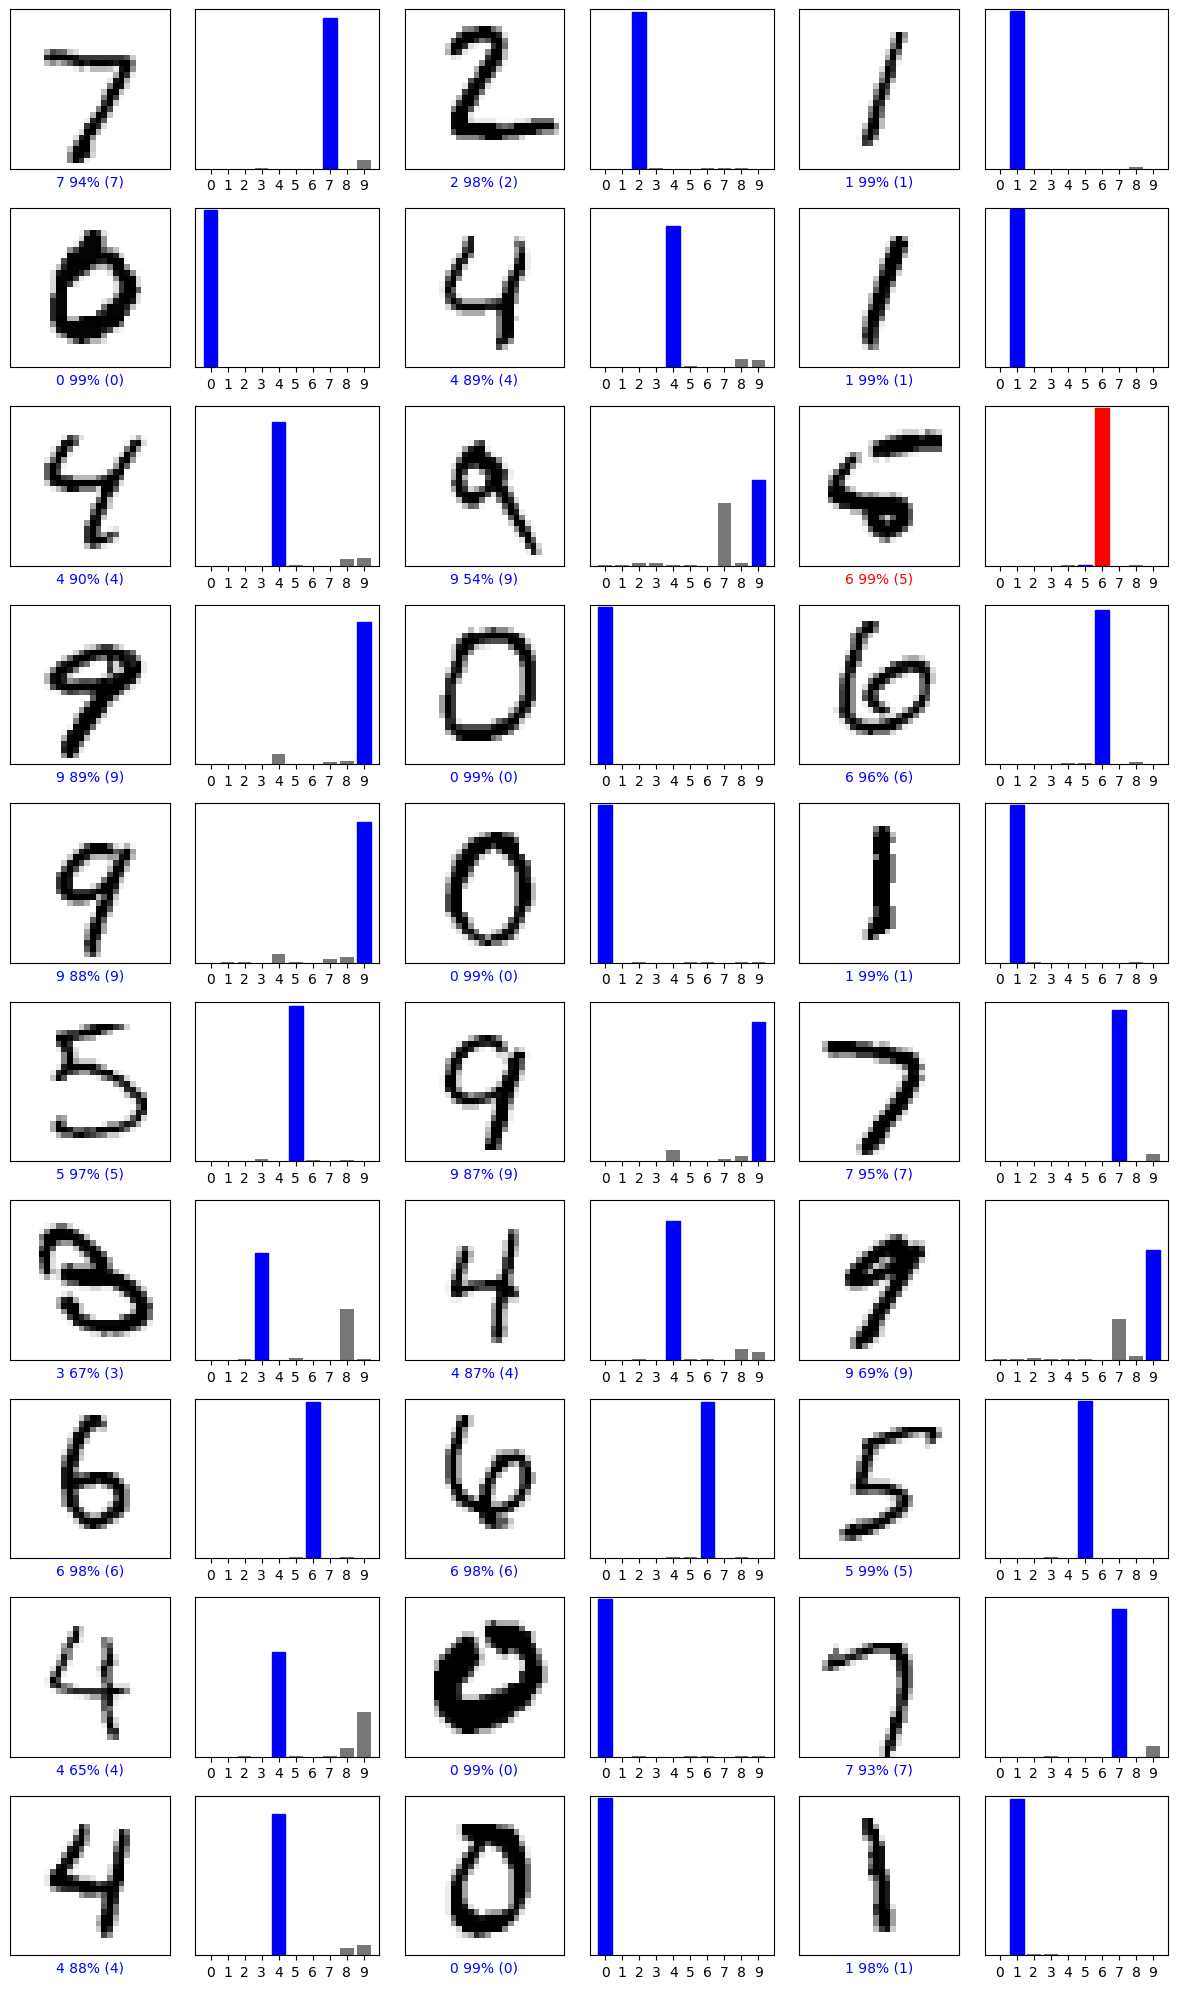

In [308]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()